<a href="https://colab.research.google.com/github/genggengi/AI/blob/master/Matplotlib%E5%AF%A6%E6%88%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

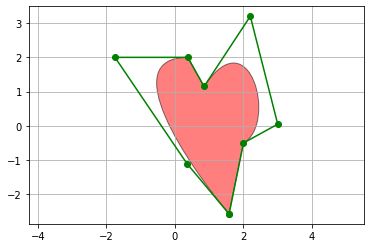

In [5]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

In [6]:
import matplotlib
matplotlib.path
matplotlib.path.Path
matplotlib.patches
matplotlib.patches.PathPatch
matplotlib.axes.Axes.add_patch

<function matplotlib.axes._base._AxesBase.add_patch>

Streamplot

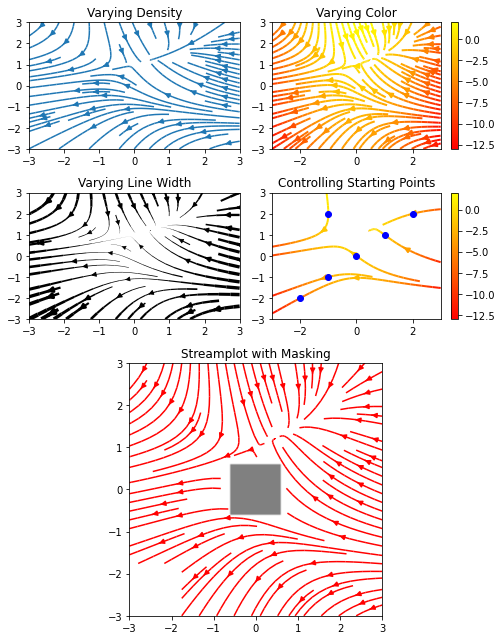

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                      cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.set(xlim=(-w, w), ylim=(-w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5, cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()

Ellipse Demo

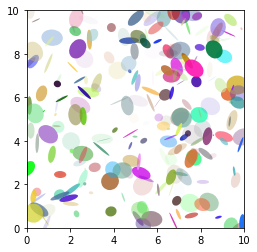

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse


# Fixing random state for reproducibility
np.random.seed(19680801)

NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

Percentiles as horizontal bar chart

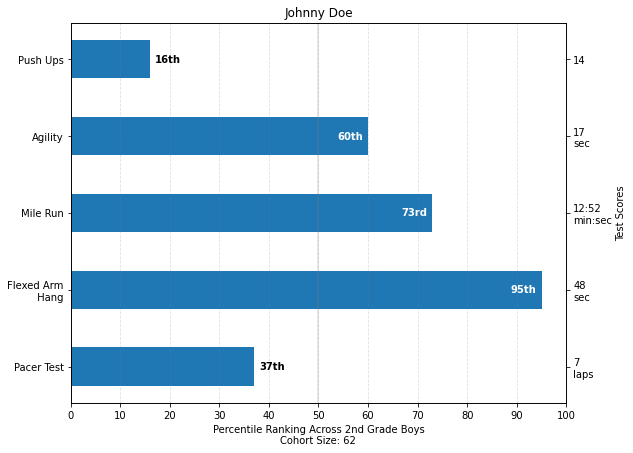

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

np.random.seed(42)

Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

# GLOBAL CONSTANTS
test_names = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility',
              'Push Ups']
test_units = dict(zip(test_names, ['laps', 'sec', 'min:sec', 'sec', '']))


def attach_ordinal(num):
    """Convert an integer to an ordinal string, e.g. 2 -> '2nd'."""
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}
    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(score, test):
    """
    Create score labels for the right y-axis as the test name followed by the
    measurement unit (if any), split over two lines.
    """
    unit = test_units[test]
    if unit:
        return f'{score}\n{unit}'
    else:  # If no unit, don't include a newline, so that label stays centered.
        return score


def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(test_names):
        return ''
    else:
        return test_names[y]


def plot_student_results(student, scores, cohort_size):
    fig, ax1 = plt.subplots(figsize=(9, 7))  # Create the figure
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(test_names))

    rects = ax1.barh(pos, [scores[k].percentile for k in test_names],
                     align='center',
                     height=0.5,
                     tick_label=test_names)

    ax1.set_title(student.name)

    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    # Plot a solid vertical gridline to highlight the median position
    ax1.axvline(50, color='grey', alpha=0.25)

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()

    # Set the tick locations
    ax2.set_yticks(pos)
    # Set equal limits on both yaxis so that the ticks line up
    ax2.set_ylim(ax1.get_ylim())

    # Set the tick labels
    ax2.set_yticklabels([format_score(scores[k].score, k) for k in test_names])

    ax2.set_ylabel('Test Scores')

    xlabel = ('Percentile Ranking Across {grade} Grade {gender}s\n'
              'Cohort Size: {cohort_size}')
    ax1.set_xlabel(xlabel.format(grade=attach_ordinal(student.grade),
                                 gender=student.gender.title(),
                                 cohort_size=cohort_size))

    rect_labels = []
    # Lastly, write in the ranking inside each bar to aid in interpretation
    for rect in rects:
        # Rectangle widths are already integer-valued but are floating
        # type, so it helps to remove the trailing decimal point and 0 by
        # converting width to int type
        width = int(rect.get_width())

        rank_str = attach_ordinal(width)
        # The bars aren't wide enough to print the ranking inside
        if width < 40:
            # Shift the text to the right side of the right edge
            xloc = 5
            # Black against white background
            clr = 'black'
            align = 'left'
        else:
            # Shift the text to the left side of the right edge
            xloc = -5
            # White on magenta
            clr = 'white'
            align = 'right'

        # Center the text vertically in the bar
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(
            rank_str, xy=(width, yloc), xytext=(xloc, 0),
            textcoords="offset points",
            horizontalalignment=align, verticalalignment='center',
            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    # Make the interactive mouse over give the bar title
    ax2.fmt_ydata = format_ycursor
    # Return all of the artists created
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels}


student = Student('Johnny Doe', 2, 'boy')
scores = dict(zip(
    test_names,
    (Score(v, p) for v, p in
     zip(['7', '48', '12:52', '17', '14'],
         np.round(np.random.uniform(0, 100, len(test_names)), 0)))))
cohort_size = 62  # The number of other 2nd grade boys

arts = plot_student_results(student, scores, cohort_size)
plt.show()

Table Demo

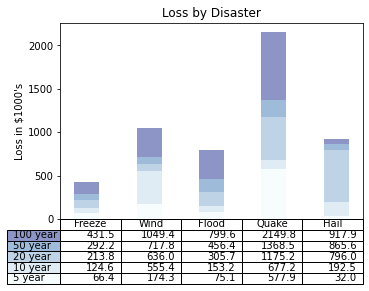

In [12]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

Slider Demo

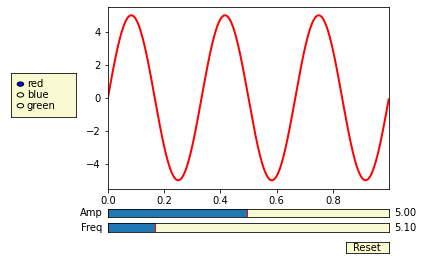

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

# Initialize plot with correct initial active value
colorfunc(radio.value_selected)

plt.show()

Polar Demo

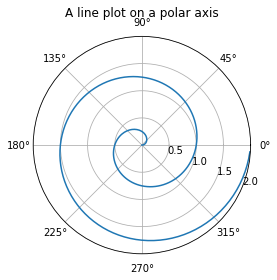

In [20]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

Legend using pre-defined labels

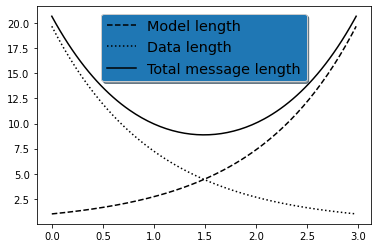

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

Mathtext Examples

0 $W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$
1 $\alpha_i > \beta_i,\ \alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ \ldots$
2 $\frac{3}{4},\ \binom{3}{4},\ \genfrac{}{}{0}{}{3}{4},\ \left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$
3 $\sqrt{2},\ \sqrt[3]{x},\ \ldots$
4 $\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ \mathrm{or}\ \mathcal{CALLIGRAPHY}$
5 $\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ \hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ \ldots$
6 $\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ \Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ \aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$
7 $\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ \log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varpropto,\ \infty,\ 

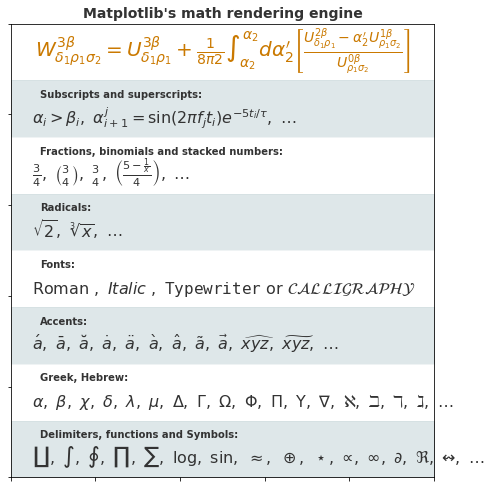

In [22]:
import matplotlib.pyplot as plt
import subprocess
import sys
import re

# Selection of features following "Writing mathematical expressions" tutorial
mathtext_titles = {
    0: "Header demo",
    1: "Subscripts and superscripts",
    2: "Fractions, binomials and stacked numbers",
    3: "Radicals",
    4: "Fonts",
    5: "Accents",
    6: "Greek, Hebrew",
    7: "Delimiters, functions and Symbols"}
n_lines = len(mathtext_titles)

# Randomly picked examples
mathext_demos = {
    0: r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
    r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} "
    r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ "
    r"U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_"
    r"{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$",

    1: r"$\alpha_i > \beta_i,\ "
    r"\alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ "
    r"\ldots$",

    2: r"$\frac{3}{4},\ \binom{3}{4},\ \genfrac{}{}{0}{}{3}{4},\ "
    r"\left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$",

    3: r"$\sqrt{2},\ \sqrt[3]{x},\ \ldots$",

    4: r"$\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ "
    r"\mathrm{or}\ \mathcal{CALLIGRAPHY}$",

    5: r"$\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ "
    r"\hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ "
    r"\ldots$",

    6: r"$\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ "
    r"\Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ "
    r"\aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$",

    7: r"$\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ "
    r"\log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varpropto,\ "
    r"\infty,\ \partial,\ \Re,\ \leftrightsquigarrow, \ \ldots$"}


def doall():
    # Colors used in Matplotlib online documentation.
    mpl_blue_rvb = (191. / 255., 209. / 256., 212. / 255.)
    mpl_orange_rvb = (202. / 255., 121. / 256., 0. / 255.)
    mpl_grey_rvb = (51. / 255., 51. / 255., 51. / 255.)

    # Creating figure and axis.
    plt.figure(figsize=(6, 7))
    plt.axes([0.01, 0.01, 0.98, 0.90], facecolor="white", frameon=True)
    plt.gca().set_xlim(0., 1.)
    plt.gca().set_ylim(0., 1.)
    plt.gca().set_title("Matplotlib's math rendering engine",
                        color=mpl_grey_rvb, fontsize=14, weight='bold')
    plt.gca().set_xticklabels("", visible=False)
    plt.gca().set_yticklabels("", visible=False)

    # Gap between lines in axes coords
    line_axesfrac = 1 / n_lines

    # Plotting header demonstration formula
    full_demo = mathext_demos[0]
    plt.annotate(full_demo,
                 xy=(0.5, 1. - 0.59 * line_axesfrac),
                 color=mpl_orange_rvb, ha='center', fontsize=20)

    # Plotting features demonstration formulae
    for i_line in range(1, n_lines):
        baseline = 1 - i_line * line_axesfrac
        baseline_next = baseline - line_axesfrac
        title = mathtext_titles[i_line] + ":"
        fill_color = ['white', mpl_blue_rvb][i_line % 2]
        plt.fill_between([0., 1.], [baseline, baseline],
                         [baseline_next, baseline_next],
                         color=fill_color, alpha=0.5)
        plt.annotate(title,
                     xy=(0.07, baseline - 0.3 * line_axesfrac),
                     color=mpl_grey_rvb, weight='bold')
        demo = mathext_demos[i_line]
        plt.annotate(demo,
                     xy=(0.05, baseline - 0.75 * line_axesfrac),
                     color=mpl_grey_rvb, fontsize=16)

    for i in range(n_lines):
        s = mathext_demos[i]
        print(i, s)
    plt.show()


if '--latex' in sys.argv:
    # Run: python mathtext_examples.py --latex
    # Need amsmath and amssymb packages.
    fd = open("mathtext_examples.ltx", "w")
    fd.write("\\documentclass{article}\n")
    fd.write("\\usepackage{amsmath, amssymb}\n")
    fd.write("\\begin{document}\n")
    fd.write("\\begin{enumerate}\n")

    for i in range(n_lines):
        s = mathext_demos[i]
        s = re.sub(r"(?<!\\)\$", "$$", s)
        fd.write("\\item %s\n" % s)

    fd.write("\\end{enumerate}\n")
    fd.write("\\end{document}\n")
    fd.close()

    subprocess.call(["pdflatex", "mathtext_examples.ltx"])
else:
    doall()